# ADS Initial Access
**Objective:** Play around with basic access / queries to the [Astrophysics Data System (ADS)](https://ui.adsabs.harvard.edu/) using [the ads Python package](https://ads.readthedocs.io/en/latest/).


**Questions:**
* Is there a characteristic publication curve describing the number of publications that a typical astronomer authors over time? E.g., Do we observe a maximum in the number of papers published in the year(s) before an astronomer gains tenure? Do we observe their coauthorship increase as they transition to mentorship roles? How do large collaborations influence someone's publications over time?

**Acknowledgements:** Special thanks to [Sarah Jane Schmidt](https://sarahjaneschmidt.com/), [Ekta Patel](https://www.ektapatelastro.com/), [Briley Lewis](http://www.briley-lewis.com/about-me.html), [Katie Breivik](https://katiebreivik.github.io/), [Ryan Trainor](http://venus.fandm.edu/~rtrainor/), [Alex Riley](https://ahriley.github.io/), [Jamie Tayar](http://ifa.hawaii.edu/~jtayar/), [Niko Sarcevic](https://de.linkedin.com/in/nikosarcevic), [Abhimat Gautam](https://abhimat.net/), [John Gizis](http://www.physics.udel.edu/~gizis/), [Nicholas Heavens](https://www.spacescience.org/bio.php?emp=NHEAVENS) for volunteering to use their names as examples of this notebook's functionality.

**Next Steps**:
* Search ADS with ORCHID rather than name
* Separate ADS access and plotting funcitonality
* Make a `refereed == True` option
* Create a way to search publications only after a specific year

In [3]:
# Imports
%matplotlib inline

# Standard
import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt

# ADS
import ads
ads.config.token = 'my token'

# Geography
# from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent="leahmfulmer.com")
# from mpl_toolkits.basemap import Basemap

# Animation??

## Characteristic Publication Curve?

**Key Questions:** If we plot publications as a histogram or cumulative distribution function, is there a "characteristic publication curve" for authors? What does it mean to be "in" or "out" of a particular field? Could one tell if one has "left" the field through their publication record?  Could we tell the difference between someone "leaving" the field to change careers vs. "leaving" for extraneous circumstances (e.g., death)?

In [8]:
# Define list of authors to search
authors = ['Fulmer, Leah', 'Tayar, Jamie', 'Heavens, Nicholas', 'Gizis, John']

# Search only refereed publications
# with open('ads_bibcodes.txt') as f:
#     journals = f.read().splitlines()

In [9]:
# Define functions for querying ADS

def firstAuthorSearch(author):
    papers = list(ads.SearchQuery(first_author = author, max_pages=100, \
                                        fl = ['aff', 'author', 'bibcode', 'first_author', 'year']))
    return papers

def orcidPubSearch(author):
    papers = list(ads.SearchQuery(orcid_pub = author, max_pages=100, \
                                        fl = ['aff', 'author', 'bibcode', 'first_author', 'year']))
    return papers

def authorSearch(author):
    papers = list(ads.SearchQuery(author = author, max_pages=100, \
                                       fl = ['aff', 'author', 'bibcode', 'first_author', 'year']))
    return papers

def selectRefereed(papers, journals):
    papers = papers[papers.str.contains('|'.join(journals))]
    
    return papers

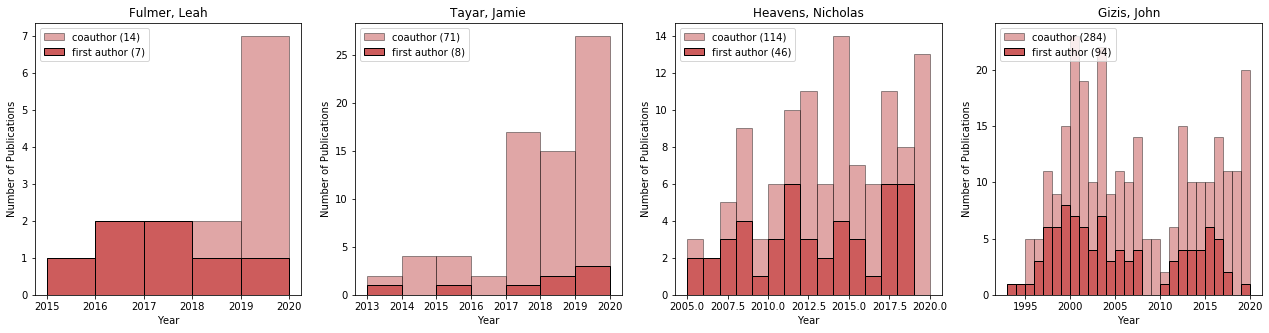

In [11]:
# Plot

a, b = (len(authors) / 4), 4
plt.figure(figsize=(5.5*b, 5*a))


for i, author in enumerate(authors):
    
    papers_first = firstAuthorSearch(author)
    papers_auth = authorSearch(author)
    
    years_first = []
    years_auth = []
    

    for paper in papers_first:
        years_first.append(int(paper.year))
        
    for paper in papers_auth:
        years_auth.append(int(paper.year))

        
        
    years_first = np.asarray(years_first)
    years_auth = np.asarray(years_auth)
    
    bins_first = np.arange(min(years_first), max(years_first) + 1, 1)
    bins_auth = np.arange(min(years_auth), max(years_auth) + 1, 1)
    
    plt.subplot(a,b,i+1)

    plt.hist(years_auth, bins = bins_auth, cumulative = False, color = 'firebrick', density=False, \
             edgecolor = 'k', alpha = 0.4, label = f'coauthor ({len(papers_auth)})')
    plt.hist(years_first, bins = bins_first, cumulative = False, color = 'indianred', density=False, \
             edgecolor = 'k', label = f'first author ({len(papers_first)})')
    
    plt.xlabel('Year')
    plt.ylabel('Number of Publications')
    plt.title(author)
    plt.legend(loc = 'upper left')

plt.show()

## Geographic Information

**Key Questions:** Can we observe where a particular person has worked based on their publication history?

In [12]:
selected_first = list(ads.SearchQuery(first_author = 'Fulmer, Leah', \
                                    max_pages=100, fl = ['aff', 'author', 'bibcode', 'first_author', 'year']))

In [21]:
latitudes = []
longitudes = []
years = []

for i in range(len(selected_first)):
    aff = selected_first[i].aff
    
    if (aff is None):
        pass
        
    elif (aff[0] is '-'):
        pass
        
    else:
        location = aff[0].split(",")
        
        matchers = ['University', 'Observatory', 'Institute']
        matching = [s for s in location if any(xs in s for xs in matchers)]
        
        geo = geolocator.geocode(matching[-1])
        
        if geo is None:
            pass
        else:
            latitudes.append(geo.latitude)
            longitudes.append(geo.longitude)
            years.append(int(selected_first[i].year))

        print(f'In {years[-1]}, Leah Fulmer was affiliated with {aff[0]}, \
located at ({latitudes[-1]}, {longitudes[-1]})\n')

In 2017, Leah Fulmer was affiliated with Department of Astronomy, University of Wisconsin, Madison, WI, 53706, USA, located at (44.8519784, -92.6167556)

In 2018, Leah Fulmer was affiliated with National Optical Astronomy Observatory, located at (32.2331721, -110.9478175)

In 2017, Leah Fulmer was affiliated with University of Wisconsin - Madison, located at (43.07982815, -89.43066425429006)

In 2016, Leah Fulmer was affiliated with University of Wisconsin - Madison, located at (43.07982815, -89.43066425429006)

In 2015, Leah Fulmer was affiliated with University of Wisconsin - Madison, located at (43.07982815, -89.43066425429006)

In 2020, Leah Fulmer was affiliated with University of Washington, Physics-Astronomy Bldg. 3910 15th Ave NE Seattle, Seattle, WA, 98195, USA, located at (47.6543238, -122.30800894320257)



## Resting place

In [ ]:
# # Setup and test geolocators
# from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent="https://leahmfulmer.com/")

# location = geolocator.geocode("University of Washington")
# print((location.latitude, location.longitude))